In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('country_arrivals.csv')
print(data.shape)
print(data.columns)
print(data.info())
print(data.isnull().sum())

(266, 68)
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-nul

Preprocessing/Cleaning of the Data

In [31]:
# Remove columns with NaN values
mexico_data_cleaned = mexico_data.dropna(axis=1, how='all')

# Use melt to transform the DataFrame
data = mexico_data_cleaned.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Number of Arrivals'
)

# Display the transformed data
data

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Number of Arrivals
0,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,1995,85446000.0
1,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,1996,90394000.0
2,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,1997,92915000.0
3,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,1998,95214000.0
4,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,1999,99869000.0
5,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,2000,105673000.0
6,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,2001,100718000.0
7,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,2002,100153000.0
8,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,2003,92330000.0
9,Mexico,MEX,"International tourism, number of arrivals",ST.INT.ARVL,2004,99250000.0


Separating Our Data into Target & Train sets to Predict Weather

In [33]:
#using most recent year as target y
target = 'Number of Arrivals'
y = data[target]
features = ['Year']
x = data[features]

#model creation 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(8, 1)
(18,)
(8,)


Model Training through a Random Forest Algorithm to classify
Plot Predicted and Errors

In [39]:
model = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
model.fit(X_train ,y_train)
model.score(X_test, y_test)

Y_pred = model.predict(X_test)
Y_pred

array([96397803.6904762 , 95913101.54761906, 86425679.52380951,
       94123729.64285713, 92122158.21428572, 97552414.4047619 ,
       78497798.57142857, 84178641.42857143])

Error Evaluation

In [45]:
errors = abs(Y_pred - y_test)
standardize = 100*errors.apply(lambda x: x/y_train, 0)
accuracy = 100 - np.mean(standardize)
print("Random Forest Model: ", accuracy, "%")

Random Forest Model:  6     96.021452
2     95.687334
12    95.718072
13    95.688865
16    94.708823
10    96.115105
25    92.162584
11    95.898595
14    95.448737
0     95.310355
23    95.847421
17    94.778937
8     95.660009
20    95.400941
1     95.567058
24    95.886173
22    95.966629
21    95.775448
dtype: float64 %


c:\Users\celgi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Plot Predicted and Errors

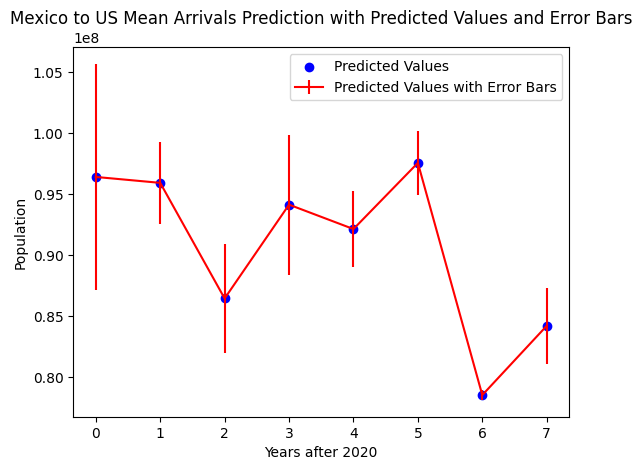

In [68]:
plt.errorbar(
    np.arange(len(Y_pred)),
    Y_pred,
    yerr=errors,
    label='Predicted Values with Error Bars',
    linestyle='-',
    color='red'  # Change the color to red or any other color for error bars
)

# Plot just the predicted values without error bars in blue
plt.scatter(
    np.arange(len(Y_pred)),
    Y_pred,
    label='Predicted Values',
    color='blue'
)

# Increase x-axis ticks density
plt.xticks(np.arange(0, len(Y_pred), step=1))  # Reduce the step value to show more points

plt.title('Mexico to US Mean Arrivals Prediction with Predicted Values and Error Bars')
plt.xlabel('Years after 2020')
plt.ylabel('Population')
plt.legend()
plt.show()